# **TELECOM X Parte 2 Prevendo CHURN**

# **Importando Bibliotecas**

As seguintes bibliotecas s√£o fundamentais para realizar uma an√°lise de churn ‚Äî ou seja, entender e prever quais clientes est√£o propensos a deixar a empresa. Cada uma delas desempenha um papel espec√≠fico e complementar no pipeline de an√°lise, desde a manipula√ß√£o dos dados at√© a prepara√ß√£o para modelagem. Vamos entender a import√¢ncia de cada uma:

A biblioteca pandas √© a base para qualquer an√°lise de dados em Python. Ela permite carregar, manipular, limpar e explorar os dados de forma eficiente. No contexto de churn, √© com pandas que voc√™ organiza o conjunto de dados dos clientes, filtra os que cancelaram, calcula estat√≠sticas descritivas, cria novas vari√°veis (como tempo de contrato ou faixa de valor), e prepara os dados para visualiza√ß√£o e modelagem. Sem pandas, seria praticamente invi√°vel trabalhar com dados tabulares de forma produtiva.

A biblioteca seaborn √© usada para criar visualiza√ß√µes estat√≠sticas elegantes e informativas. Ela facilita a identifica√ß√£o de padr√µes, correla√ß√µes e distribui√ß√µes que podem estar associadas ao comportamento de churn. Por exemplo, com seaborn voc√™ pode criar gr√°ficos de barras para comparar taxas de cancelamento entre diferentes tipos de contrato, ou usar gr√°ficos de dispers√£o para visualizar a rela√ß√£o entre valor mensal e probabilidade de sa√≠da. Essas visualiza√ß√µes ajudam a gerar hip√≥teses e comunicar insights de forma clara.

J√° matplotlib.pyplot √© a base sobre a qual o seaborn √© constru√≠do, e oferece controle total sobre os elementos gr√°ficos. Com plt, voc√™ pode personalizar t√≠tulos, eixos, legendas e salvar os gr√°ficos em alta resolu√ß√£o. Ele √© especialmente √∫til quando voc√™ precisa ajustar detalhes finos das visualiza√ß√µes ou criar gr√°ficos mais espec√≠ficos que n√£o est√£o diretamente dispon√≠veis no seaborn.

A fun√ß√£o make_column_transformer da biblioteca sklearn.compose √© essencial na etapa de pr√©-processamento, especialmente quando voc√™ est√° preparando os dados para alimentar um modelo de machine learning. Ela permite aplicar diferentes transforma√ß√µes a diferentes colunas de forma organizada e eficiente. Por exemplo, voc√™ pode aplicar codifica√ß√£o a vari√°veis categ√≥ricas e normaliza√ß√£o a vari√°veis num√©ricas, tudo dentro de um √∫nico pipeline.

Por fim, o OneHotEncoder da sklearn.preprocessing √© uma ferramenta indispens√°vel para transformar vari√°veis categ√≥ricas em uma representa√ß√£o num√©rica que os modelos conseguem interpretar. No caso da an√°lise de churn, vari√°veis como tipo de contrato, m√©todo de pagamento ou localiza√ß√£o precisam ser convertidas em colunas bin√°rias para que o modelo possa aprender com elas. O uso do OneHotEncoder garante que essa transforma√ß√£o seja feita corretamente, sem atribuir ordens artificiais √†s categorias.

Em conjunto, essas bibliotecas formam um ecossistema poderoso para realizar uma an√°lise de churn completa, desde a explora√ß√£o inicial dos dados at√© a constru√ß√£o de modelos preditivos robustos.


In [158]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# **PREPARANDO OS DADOS**

In [159]:
df = pd.read_csv('/content/dados_tratados.csv')

In [160]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   int64  
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   int64  
 5   dependents         7032 non-null   int64  
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   int64  
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 

In [161]:
df.head()

customer_id  churn  gender  senior_citizen  partner  dependents  tenure  \
0  0002-ORFBO      0  Female               0        1           1       9   
1  0003-MKNFE      0    Male               0        0           0       9   
2  0004-TLHLJ      1    Male               0        0           0       4   
3  0011-IGKFF      1    Male               1        1           0      13   
4  0013-EXCHZ      1  Female               1        1           0       3   

   phone_service multiple_lines internet_service  ... device_protection  \
0              1             No              DSL  ...                No   
1              1            Yes              DSL  ...                No   
2              1             No      Fiber optic  ...               Yes   
3              1             No      Fiber optic  ...               Yes   
4              1             No      Fiber optic  ...                No   

  tech_support streaming_tv streaming_movies        contract  \
0          Yes          Yes               No        One year   
1           No           No              Yes  Month-to-month   
2           No           No               No  Month-to-month   
3           No          Yes              Yes  Month-to-month   
4          Yes          Yes               No  Month-to-month   

  paperless_billing    payment_method  monthly_charges total_charges  \
0                 1      Mailed check             65.6        593.30   
1                 0      Mailed check             59.9        542.40   
2                 1  Electronic check             73.9        280.85   
3                 1  Electronic check             98.0       1237.85   
4                 1      Mailed check             83.9        267.40   

   contas_diarias  
0        2.186667  
1        1.996667  
2        2.463333  
3        3.266667  
4        2.796667  

[5 rows x 22 columns]

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   int64  
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   int64  
 5   dependents         7032 non-null   int64  
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   int64  
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 

In [163]:
df.describe()

churn  senior_citizen      partner   dependents       tenure  \
count  7032.000000     7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.265785        0.162400     0.482509     0.298493    32.421786   
std       0.441782        0.368844     0.499729     0.457629    24.545260   
min       0.000000        0.000000     0.000000     0.000000     1.000000   
25%       0.000000        0.000000     0.000000     0.000000     9.000000   
50%       0.000000        0.000000     0.000000     0.000000    29.000000   
75%       1.000000        0.000000     1.000000     1.000000    55.000000   
max       1.000000        1.000000     1.000000     1.000000    72.000000   

       phone_service  paperless_billing  monthly_charges  total_charges  \
count    7032.000000        7032.000000      7032.000000    7032.000000   
mean        0.903299           0.592719        64.798208    2283.300441   
std         0.295571           0.491363        30.085974    2266.771362   
min         0.000000           0.000000        18.250000      18.800000   
25%         1.000000           0.000000        35.587500     401.450000   
50%         1.000000           1.000000        70.350000    1397.475000   
75%         1.000000           1.000000        89.862500    3794.737500   
max         1.000000           1.000000       118.750000    8684.800000   

       contas_diarias  
count     7032.000000  
mean         2.159940  
std          1.002866  
min          0.608333  
25%          1.186250  
50%          2.345000  
75%          2.995417  
max          3.958333

In [164]:
df.columns

Index(['customer_id', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'contas_diarias'],
      dtype='object')

# **REMOVENDO AS COLUNAS IRRELEVANTES**

In [165]:
df = df.drop(columns=['customer_id'], axis=1)
df

churn  gender  senior_citizen  partner  dependents  tenure  \
0         0  Female               0        1           1       9   
1         0    Male               0        0           0       9   
2         1    Male               0        0           0       4   
3         1    Male               1        1           0      13   
4         1  Female               1        1           0       3   
...     ...     ...             ...      ...         ...     ...   
7027      0  Female               0        0           0      13   
7028      1    Male               0        1           0      22   
7029      0    Male               0        0           0       2   
7030      0    Male               0        1           1      67   
7031      0    Male               0        1           1      63   

      phone_service multiple_lines internet_service online_security  ...  \
0                 1             No              DSL              No  ...   
1                 1            Yes              DSL              No  ...   
2                 1             No      Fiber optic              No  ...   
3                 1             No      Fiber optic              No  ...   
4                 1             No      Fiber optic              No  ...   
...             ...            ...              ...             ...  ...   
7027              1             No              DSL             Yes  ...   
7028              1            Yes      Fiber optic              No  ...   
7029              1             No              DSL              No  ...   
7030              1             No              DSL             Yes  ...   
7031              0             No              DSL             Yes  ...   

     device_protection tech_support streaming_tv streaming_movies  \
0                   No          Yes          Yes               No   
1                   No           No           No              Yes   
2                  Yes           No           No               No   
3                  Yes           No          Yes              Yes   
4                   No          Yes          Yes               No   
...                ...          ...          ...              ...   
7027                No          Yes           No               No   
7028                No           No           No              Yes   
7029                No           No           No               No   
7030               Yes          Yes           No              Yes   
7031               Yes           No          Yes              Yes   

            contract paperless_billing    payment_method monthly_charges  \
0           One year                 1      Mailed check           65.60   
1     Month-to-month                 0      Mailed check           59.90   
2     Month-to-month                 1  Electronic check           73.90   
3     Month-to-month                 1  Electronic check           98.00   
4     Month-to-month                 1      Mailed check           83.90   
...              ...               ...               ...             ...   
7027        One year                 0      Mailed check           55.15   
7028  Month-to-month                 1  Electronic check           85.10   
7029  Month-to-month                 1      Mailed check           50.30   
7030        Two year                 0      Mailed check           67.85   
7031        Two year                 0  Electronic check           59.00   

      total_charges  contas_diarias  
0            593.30        2.186667  
1            542.40        1.996667  
2            280.85        2.463333  
3           1237.85        3.266667  
4            267.40        2.796667  
...             ...             ...  
7027         742.90        1.838333  
7028        1873.70        2.836667  
7029          92.75        1.676667  
7030        4627.65        2.261667  
7031        3707.60        1.966667  

[7032 rows x 21 columns]

In [166]:
df = df.drop(columns=['contas_diarias'])

# **Codifica√ß√£o de Vari√°veis Categ√≥ricas com One-Hot Encoding**


Para que os algoritmos de machine learning possam processar os dados de forma eficiente, √© necess√°rio que todas as vari√°veis estejam em formato num√©rico. Como muitos modelos n√£o conseguem lidar diretamente com vari√°veis categ√≥ricas, aplicamos a t√©cnica de One-Hot Encoding para transformar essas vari√°veis em representa√ß√µes bin√°rias.

O One-Hot Encoding consiste em criar uma nova coluna para cada categoria distinta dentro de uma vari√°vel categ√≥rica. Cada linha recebe o valor 1 na coluna correspondente √† sua categoria e 0 nas demais, permitindo que o modelo interprete corretamente essas informa√ß√µes sem atribuir ordens ou pesos indevidos.

No projeto, utilizamos a fun√ß√£o make_column_transformer em conjunto com a classe OneHotEncoder da biblioteca sklearn.preprocessing para realizar essa transforma√ß√£o de forma eficiente e escal√°vel.

As colunas categ√≥ricas selecionadas para o encoding foram:
- gender
- multiple_lines
- internet_service
- online_security
- online_backup
- device_protection
- tech_support
- streaming_tv
- streaming_movies
- contract
- payment_method

Para garantir robustez na transforma√ß√£o, configuramos o par√¢metro handle_unknown='ignore' no OneHotEncoder, o que permite que o pipeline lide com categorias desconhecidas que possam surgir em novos dados, evitando erros durante a infer√™ncia.

Al√©m disso, utilizamos remainder='passthrough' para manter todas as colunas n√£o categ√≥ricas no DataFrame final, preservando informa√ß√µes importantes para a modelagem.

O resultado dessa transforma√ß√£o foi armazenado em um novo DataFrame chamado dados_encoded, que agora cont√©m apenas vari√°veis num√©ricas e est√° pronto para ser utilizado na constru√ß√£o dos modelos preditivos de churn.

In [167]:
colunas_categoricas = [
    'gender', 'multiple_lines', 'internet_service',
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies',
    'contract', 'payment_method'
]

In [168]:
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')
dados_encoded = one_hot_enc.fit_transform(df)
dados_encoded = pd.DataFrame(dados_encoded, columns=one_hot_enc.get_feature_names_out())
dados_encoded

onehotencoder__gender_Female  onehotencoder__gender_Male  \
0                              1.0                         0.0   
1                              0.0                         1.0   
2                              0.0                         1.0   
3                              0.0                         1.0   
4                              1.0                         0.0   
...                            ...                         ...   
7027                           1.0                         0.0   
7028                           0.0                         1.0   
7029                           0.0                         1.0   
7030                           0.0                         1.0   
7031                           0.0                         1.0   

      onehotencoder__multiple_lines_No  onehotencoder__multiple_lines_Yes  \
0                                  1.0                                0.0   
1                                  0.0                                1.0   
2                                  1.0                                0.0   
3                                  1.0                                0.0   
4                                  1.0                                0.0   
...                                ...                                ...   
7027                               1.0                                0.0   
7028                               0.0                                1.0   
7029                               1.0                                0.0   
7030                               1.0                                0.0   
7031                               1.0                                0.0   

      onehotencoder__internet_service_DSL  \
0                                     1.0   
1                                     1.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
7027                                  1.0   
7028                                  0.0   
7029                                  1.0   
7030                                  1.0   
7031                                  1.0   

      onehotencoder__internet_service_Fiber optic  \
0                                             0.0   
1                                             0.0   
2                                             1.0   
3                                             1.0   
4                                             1.0   
...                                           ...   
7027                                          0.0   
7028                                          1.0   
7029                                          0.0   
7030                                          0.0   
7031                                          0.0   

      onehotencoder__internet_service_No  onehotencoder__online_security_No  \
0                                    0.0                                1.0   
1                                    0.0                                1.0   
2                                    0.0                                1.0   
3                                    0.0                                1.0   
4                                    0.0                                1.0   
...                                  ...                                ...   
7027                                 0.0                                0.0   
7028                                 0.0                                1.0   
7029                                 0.0                                1.0   
7030                                 0.0                                0.0   
7031                                 0.0                                0.0   

      onehotencoder__online_security_Yes  onehotencoder__online_backup_No  \
0                                    0.0                              0.0   
1      

# **Verifica√ß√£o da Propor√ß√£o de Evas√£o (CHURN)**

Antes de iniciar a modelagem preditiva, √© essencial compreender a distribui√ß√£o da vari√°vel alvo ‚Äî neste caso, a vari√°vel churn, que indica se um cliente deixou ou permaneceu na empresa. Essa an√°lise nos ajuda a entender o equil√≠brio ou desequil√≠brio entre as classes e a tomar decis√µes mais informadas sobre o tipo de modelo e m√©tricas de avalia√ß√£o a serem utilizadas.

Realizamos a verifica√ß√£o da propor√ß√£o de evas√£o por meio da an√°lise da distribui√ß√£o absoluta e percentual da vari√°vel churn.


# Distribui√ß√£o absoluta

In [169]:
df ['churn'].value_counts()

churn
0    5163
1    1869
Name: count, dtype: int64

# Distribui√ß√£o percentual

In [170]:
df ['churn'].value_counts(normalize=True) * 100

churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

/tmp/ipython-input-3930219957.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='Set3')


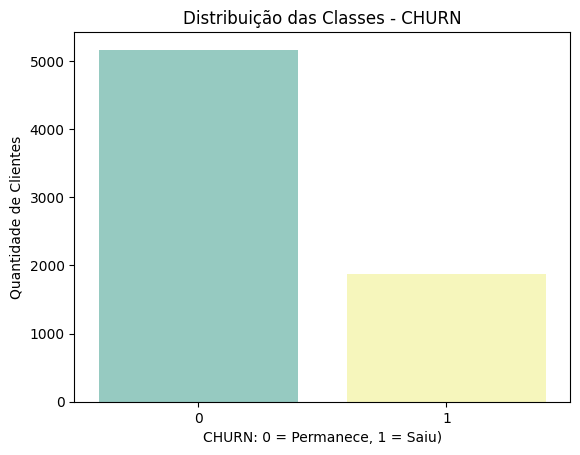

In [171]:
sns.countplot(x='churn', data=df, palette='Set3')
plt.title('Distribui√ß√£o das Classes - CHURN')
plt.xlabel('CHURN: 0 = Permanece, 1 = Saiu)')
plt.ylabel('Quantidade de Clientes')
plt.show()

# Interpreta√ß√£o dos Resultados

- A distribui√ß√£o absoluta mostra o n√∫mero total de clientes que evadiram (churn = 1) e os que permaneceram (churn = 0).
- A distribui√ß√£o percentual revela a propor√ß√£o de cada grupo em rela√ß√£o ao total de clientes, permitindo identificar se h√° desbalanceamento de classes.
Esse desbalanceamento √© comum em problemas de churn, onde geralmente a maioria dos clientes permanece e apenas uma fra√ß√£o evadem.

# Principais Conclus√µes da An√°lise de Dados ‚Äî Vari√°vel Churn

A an√°lise da vari√°vel churn, que representa a evas√£o de clientes, revelou insights importantes sobre o comportamento da base de clientes da Telecom X:

Distribui√ß√£o Observada
- Clientes que permaneceram (churn = 0): 5.163 registros ‚Äî 73,42% da base.
- Clientes que evadiram (churn = 1): 1.869 registros ‚Äî 26,57% da base.

Conclus√µes Relevantes
1. Presen√ßa de Desbalanceamento de Classes
A propor√ß√£o entre clientes que permaneceram e os que evadiram est√° significativamente desbalanceada. Apenas cerca de 1 em cada 4 clientes apresenta comportamento de churn. Esse desbalanceamento pode impactar negativamente o desempenho de modelos preditivos, que tendem a favorecer a classe majorit√°ria. Portanto, ser√° necess√°rio aplicar t√©cnicas de balanceamento ou utilizar m√©tricas adequadas para avalia√ß√£o.
2. Churn √© um problema relevante
Com uma taxa de evas√£o superior a 25%, a empresa enfrenta um desafio consider√°vel em manter sua base de clientes. Esse n√∫mero refor√ßa a import√¢ncia de desenvolver modelos preditivos eficazes para identificar perfis de risco e implementar estrat√©gias de reten√ß√£o.
3. Potencial para segmenta√ß√£o e a√ß√£o estrat√©gica
A identifica√ß√£o de caracter√≠sticas comuns entre os clientes que evadem pode permitir √† empresa criar campanhas direcionadas, ajustar planos ou melhorar servi√ßos espec√≠ficos. A modelagem preditiva ser√° essencial para revelar esses padr√µes.


# An√°lise de Correla√ß√£o

 Import√¢ncia da Matriz de Correla√ß√£o na An√°lise de Churn
A matriz de correla√ß√£o √© uma representa√ß√£o estat√≠stica que mostra o grau de associa√ß√£o entre vari√°veis num√©ricas. No contexto da an√°lise de churn, ela desempenha um papel estrat√©gico na compreens√£o dos fatores que influenciam a evas√£o de clientes.

Por que a matriz de correla√ß√£o √© importante?
- 1. Identifica√ß√£o de vari√°veis relevantes para o churn
Ao analisar a correla√ß√£o entre vari√°veis independentes (como tempo de contrato, uso de servi√ßos, faturamento mensal) e a vari√°vel alvo churn, √© poss√≠vel identificar quais atributos t√™m maior influ√™ncia no comportamento de evas√£o. Por exemplo, uma forte correla√ß√£o positiva entre MonthlyCharges e churn pode indicar que clientes com faturas mais altas tendem a cancelar o servi√ßo.
- 2. Redu√ß√£o de multicolinearidade
A matriz tamb√©m ajuda a detectar vari√°veis altamente correlacionadas entre si (por exemplo, TotalCharges e MonthlyCharges). Isso √© essencial para evitar problemas de multicolinearidade em modelos estat√≠sticos e de machine learning, que podem distorcer os resultados e dificultar a interpreta√ß√£o dos coeficientes.
- 3. Apoio na sele√ß√£o de vari√°veis para modelagem
Com base na correla√ß√£o, √© poss√≠vel realizar uma sele√ß√£o mais criteriosa de vari√°veis para os modelos preditivos, priorizando aquelas que t√™m maior rela√ß√£o com o churn e descartando vari√°veis redundantes ou irrelevantes.
- 4. Facilita a interpreta√ß√£o e comunica√ß√£o dos dados
Visualmente, a matriz de correla√ß√£o (especialmente quando apresentada como um heatmap) permite uma leitura r√°pida e intuitiva dos relacionamentos entre vari√°veis, sendo uma excelente ferramenta para apresenta√ß√µes e relat√≥rios.

Aplica√ß√£o no Case de Churn
No case da Telecom X, a matriz de correla√ß√£o pode revelar, por exemplo:
- Se clientes com contratos mensais t√™m maior propens√£o ao churn.
- Se o uso de servi√ßos adicionais (como suporte t√©cnico ou streaming) est√° associado √† perman√™ncia.
- Se valores altos de cobran√ßa est√£o correlacionados com insatisfa√ß√£o e cancelamento.
Essas descobertas orientam decis√µes estrat√©gicas, como ajustes nos planos, melhorias no atendimento ou campanhas de reten√ß√£o focadas em perfis de risco.



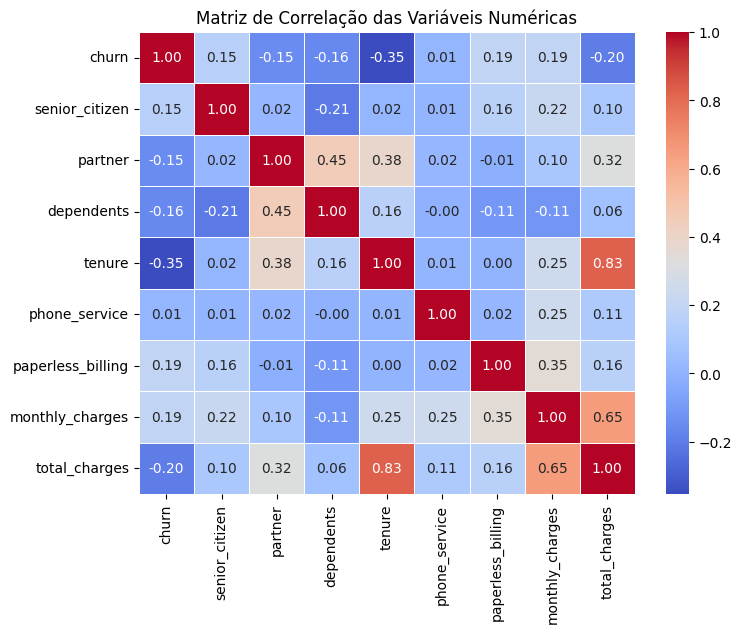

In [172]:
dados_numericos = df.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correla√ß√£o
matriz_correlacao = dados_numericos.corr()

# Visualizando a matriz de correla√ß√£o com um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correla√ß√£o das Vari√°veis Num√©ricas')
plt.show()


A matriz de correla√ß√£o revela rela√ß√µes importantes entre vari√°veis que influenciam o churn:

Correla√ß√µes com Churn
- Tenure (-0.35): Correla√ß√£o negativa moderada. Clientes com mais tempo de casa tendem a permanecer.
- Total Charges (-0.20): Clientes que j√° pagaram mais ao longo do tempo t√™m menor probabilidade de evasa√µ.
- Partner (-0.15) e Dependents (-0.16): Correla√ß√µes negativas fracas. Ter parceiro ou dependentes est√° levemente associado √† fidelidade.
- Monthly Charges (0.19): Correla√ß√£o positiva fraca. Clientes com cobran√ßas mensais mais altas tendem a cancelar mais.
- Senior Citizen (0.15): Idosos t√™m uma leve tend√™ncia maior ao churn.
- Paperless Billing (0.19): Pode indicar que clientes com cobran√ßa digital s√£o mais propensos a cancelar.

üîó Rela√ß√µes entre outras vari√°veis
- Tenure e Total Charges (0.83): Forte correla√ß√£o positiva. Clientes antigos acumulam mais gastos.
- Monthly Charges e Total Charges (0.65): Clientes com cobran√ßas mensais maiores acumulam mais gastos.
- Partner e Dependents (0.45): Ter parceiro est√° moderadamente associado a ter dependentes.


Conclus√£o
- O churn est√° mais relacionado a tempo de perman√™ncia e valores pagos do que a caracter√≠sticas demogr√°ficas.
- Clientes novos com cobran√ßas altas s√£o mais propensos a cancelar.
- V√≠nculos familiares (parceiro, dependentes) est√£o associados √† reten√ß√£o.

In [88]:
# Valores nulos por coluna
print("Valores nulos por coluna:\n")
print(df.isnull().sum())


Valores nulos por coluna:

churn                0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64


# An√°lises Direcionadas: Tempo de Contrato e Total Gasto vs Evas√£o

Nesta etapa, buscamos entender como o tempo de contrato (Tenure) e o total gasto (Total Charges) influenciam a evas√£o de clientes (Churn). A hip√≥tese √© que clientes com maior tempo de perman√™ncia e maior valor investido tendem a permanecer na empresa.

Boxplot: Tempo de Contrato vs Evas√£o
O gr√°fico de boxplot foi utilizado para visualizar a distribui√ß√£o do tempo de contrato entre dois grupos de clientes:
- Churn = 0: Clientes que permaneceram
- Churn = 1: Clientes que cancelaram
A an√°lise revela que:
- Clientes que evadiram (Churn = 1) possuem, em m√©dia, tempo de contrato significativamente menor.
- J√° os clientes que permaneceram (Churn = 0) apresentam distribui√ß√£o mais ampla, com muitos casos de contratos longos.
- A mediana do tempo de contrato √© visivelmente maior para o grupo que permaneceu, refor√ßando a ideia de que tempo de relacionamento √© um fator protetor contra a evas√£o.

Esse padr√£o sugere que estrat√©gias voltadas para aumentar o engajamento nos primeiros meses podem ser eficazes para reduzir o churn. Al√©m disso, programas de fidelidade ou benef√≠cios progressivos ao longo do tempo podem incentivar a perman√™ncia.


/tmp/ipython-input-2684891119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='tenure', data=df, palette='Set3')


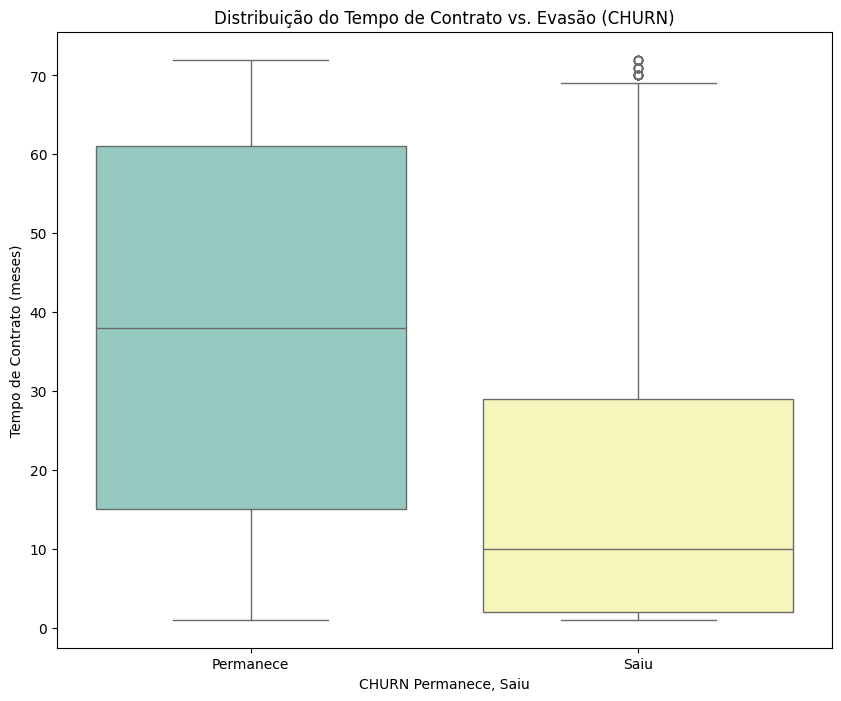

In [173]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='churn', y='tenure', data=df, palette='Set3')
plt.title('Distribui√ß√£o do Tempo de Contrato vs. Evas√£o (CHURN)')
plt.xlabel('CHURN Permanece, Saiu')
plt.ylabel('Tempo de Contrato (meses)')
plt.xticks([0, 1], ['Permanece', 'Saiu'])
plt.show()

/tmp/ipython-input-1262420735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='total_charges', data=df, palette='Set3')


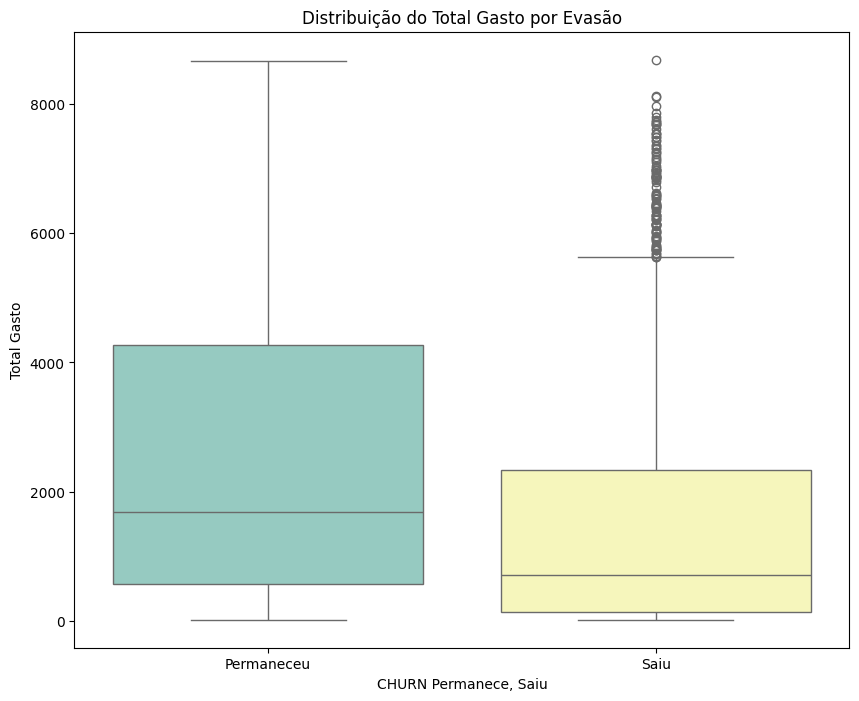

In [101]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='churn', y='total_charges', data=df, palette='Set3')
plt.title('Distribui√ß√£o do Total Gasto por Evas√£o')
plt.xlabel('CHURN Permanece, Saiu')
plt.ylabel('Total Gasto')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.show()

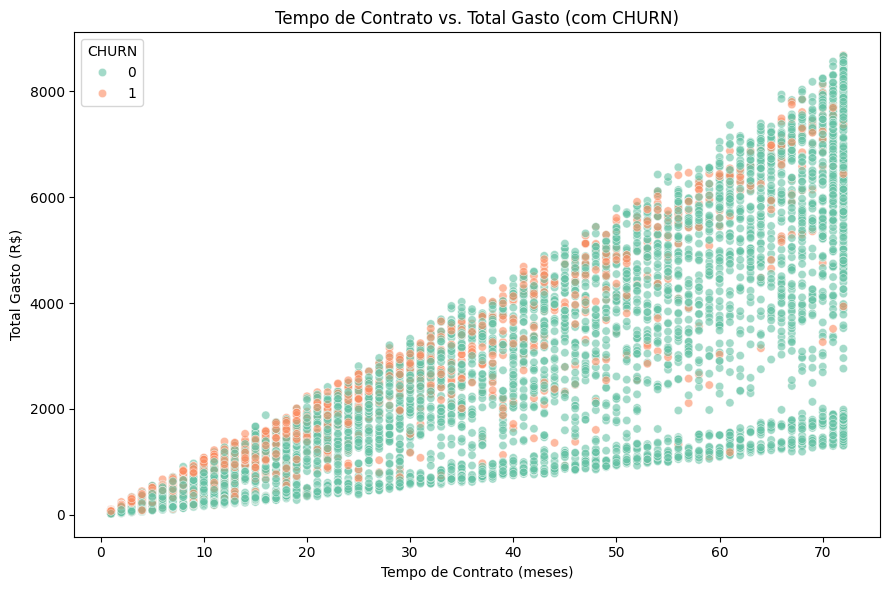

In [104]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df,
    x='tenure',
    y='total_charges',
    hue='churn',
    palette='Set2',
    alpha=0.6
)
plt.title('Tempo de Contrato vs. Total Gasto (com CHURN)')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='CHURN')
plt.tight_layout()
plt.show()

# Scatter Plot ‚Äî Tempo de Contrato x Total Gasto com Churn

Este gr√°fico de dispers√£o mostra a rela√ß√£o entre tempo de contrato (Tenure) e total gasto (Total Charges), com os pontos coloridos de acordo com o status de churn (evadido ou n√£o).

Padr√µes Observados
- Clientes com churn (Churn = 1) est√£o concentrados na regi√£o inferior esquerda do gr√°fico ‚Äî ou seja, possuem baixo tempo de contrato e baixo total gasto.
- √Ä medida que o tempo de contrato aumenta, o total gasto tamb√©m cresce, formando uma tend√™ncia ascendente clara entre essas duas vari√°veis.
- A regi√£o superior direita do gr√°fico √© dominada por clientes que n√£o evadiram (Churn = 0), indicando que clientes antigos e com maior investimento tendem a permanecer.
- H√° poucos pontos de churn em contratos longos, refor√ßando que a evas√£o ocorre majoritariamente nos primeiros meses.


Interpreta√ß√£o
- Existe uma correla√ß√£o positiva entre tempo de contrato e total gasto, como esperado.
- O churn est√° fortemente associado a clientes com pouco tempo de relacionamento e baixo investimento financeiro.
- Clientes que permanecem por mais tempo tendem a acumular maior gasto e demonstram maior fidelidade.

Implica√ß√µes Estrat√©gicas
- Foco em reten√ß√£o nos primeiros meses √© essencial.
- Oferecer benef√≠cios progressivos ou incentivos iniciais pode ajudar a reduzir churn precoce.
- Monitorar clientes com baixo tenure e baixo gasto pode permitir a√ß√µes preventivas antes da evas√£o.


# **Modelagem Preditiva**

A etapa de modelagem preditiva exige uma prepara√ß√£o cuidadosa dos dados para garantir que os algoritmos de aprendizado de m√°quina possam extrair padr√µes de forma eficiente e confi√°vel. Um dos primeiros passos fundamentais √© a separa√ß√£o dos dados em conjuntos de treino e teste.

Essa divis√£o permite que o modelo aprenda com uma parte dos dados (treino) e seja avaliado com outra parte que ele nunca viu (teste), simulando seu desempenho em situa√ß√µes reais. No presente trabalho, essa separa√ß√£o foi realizada utilizando a fun√ß√£o train_test_split, com 70% dos dados destinados ao treinamento e 30% √† valida√ß√£o.

Al√©m disso, foi aplicada a estrat√©gia de estratifica√ß√£o com base na vari√°vel alvo (churn), assegurando que a propor√ß√£o entre classes seja mantida em ambos os conjuntos. Isso √© especialmente importante em problemas com desbalanceamento, pois evita que o modelo seja treinado ou avaliado com distribui√ß√µes distorcidas.


In [105]:
from sklearn.model_selection import train_test_split
X = dados_encoded.drop(columns=['remainder__churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

# Balanceamento de Classes

Outro ponto cr√≠tico na prepara√ß√£o dos dados √© o balanceamento das classes. Em muitos cen√°rios reais, como o de previs√£o de evas√£o de clientes, √© comum que a classe de interesse (clientes que evadem) seja significativamente menor que a classe majorit√°ria (clientes que permanecem). Esse desbalanceamento pode levar os modelos a aprenderem padr√µes enviesados, favorecendo a classe mais frequente e prejudicando a capacidade de detectar casos relevantes. Para mitigar esse problema, foi aplicada a t√©cnica de oversampling, que aumenta a representatividade da classe minorit√°ria no conjunto de treino. Com isso, o modelo √© incentivado a aprender de forma mais equitativa, melhorando sua sensibilidade e capacidade de generaliza√ß√£o.

In [106]:
from imblearn.over_sampling import SMOTE

In [107]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Verificando novas propor√ß√µes
print("Antes do SMOTE:")
print(y_train.value_counts(normalize=True))

print("\nDepois do SMOTE:")
print(y_res.value_counts(normalize=True))

Antes do SMOTE:
churn
0    0.734254
1    0.265746
Name: proportion, dtype: float64

Depois do SMOTE:
churn
1    0.5
0    0.5
Name: proportion, dtype: float64


# Padronizando os Dados (normaliza√ß√£o z-score)

Por fim, foi realizada a padroniza√ß√£o dos dados num√©ricos por meio da normaliza√ß√£o Z-score. Essa t√©cnica transforma as vari√°veis para que tenham m√©dia zero e desvio padr√£o igual a um, o que √© essencial para algoritmos que s√£o sens√≠veis √† escala dos dados, como regress√£o log√≠stica, SVM e redes neurais. Ao aplicar essa padroniza√ß√£o, evita-se que atributos com magnitudes maiores dominem o processo de aprendizado, promovendo uma contribui√ß√£o equilibrada de todas as vari√°veis. Essa etapa tamb√©m acelera a converg√™ncia dos algoritmos e melhora a estabilidade dos resultados.

Em conjunto, essas etapas de prepara√ß√£o dos dados s√£o indispens√°veis para garantir que os modelos preditivos sejam robustos, justos e eficazes na tarefa de identificar padr√µes de evas√£o de clientes.


In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

# **CRIA√á√ÉO DOS MODELOS**

A etapa de cria√ß√£o dos modelos √© o n√∫cleo da abordagem preditiva, onde algoritmos de aprendizado de m√°quina s√£o treinados para identificar padr√µes e realizar previs√µes sobre a evas√£o de clientes. Para este desafio, foram selecionados tr√™s modelos de classifica√ß√£o: Regress√£o Log√≠stica, Random Forest e K-Nearest Neighbors (KNN). A escolha desses algoritmos foi guiada por suas caracter√≠sticas distintas, pela necessidade ou n√£o de normaliza√ß√£o dos dados e pela complementaridade entre abordagens lineares, baseadas em √°rvores e baseadas em dist√¢ncia.

A **Regress√£o Log√≠stica** foi escolhida por sua simplicidade e alta interpretabilidade. Trata-se de um modelo linear que estima a probabilidade de uma inst√¢ncia pertencer a uma classe por meio da aplica√ß√£o de uma fun√ß√£o sigmoide sobre uma combina√ß√£o linear das vari√°veis preditoras. Por ser sens√≠vel √† escala das features, a Regress√£o Log√≠stica exige que os dados sejam normalizados ‚Äî como foi feito com a padroniza√ß√£o Z-score ‚Äî para garantir que todas as vari√°veis contribuam de forma equilibrada para o processo de otimiza√ß√£o. Essa caracter√≠stica torna o modelo especialmente adequado para problemas em que a compreens√£o dos fatores que influenciam a vari√°vel alvo √© t√£o importante quanto a acur√°cia da previs√£o. Al√©m disso, por ser um modelo simples, a Regress√£o Log√≠stica funciona como um excelente ponto de partida (baseline) para compara√ß√£o com modelos mais sofisticados.

O **Random Forest**, por sua vez, representa uma abordagem mais robusta e flex√≠vel. Trata-se de um m√©todo de ensemble que combina diversas √°rvores de decis√£o, cada uma constru√≠da a partir de subconjuntos aleat√≥rios dos dados e das features. Por ser baseado em divis√µes condicionais dentro de cada vari√°vel, o Random Forest n√£o √© afetado pela escala das features, dispensando a necessidade de normaliza√ß√£o. Essa caracter√≠stica o torna pr√°tico e eficiente em cen√°rios com vari√°veis heterog√™neas. Al√©m disso, o Random Forest √© conhecido por sua resist√™ncia a outliers, capacidade de capturar rela√ß√µes n√£o lineares e por fornecer estimativas da import√¢ncia das vari√°veis, o que contribui para a interpreta√ß√£o dos resultados. Sua robustez e bom desempenho geral fazem dele uma escolha confi√°vel para problemas de classifica√ß√£o complexos.

O modelo **K-Nearest Neighbors (KNN)**, que classifica uma inst√¢ncia com base na proximidade em rela√ß√£o aos seus vizinhos mais pr√≥ximos no espa√ßo das features. Por ser um algoritmo baseado em dist√¢ncia, o KNN tamb√©m exige que os dados estejam normalizados, pois diferen√ßas de escala podem distorcer as medidas de proximidade e comprometer a acur√°cia do modelo. A inclus√£o do KNN permite explorar uma abordagem n√£o param√©trica, sens√≠vel √† distribui√ß√£o local dos dados, e comparar seu desempenho com os modelos linear e baseado em √°rvores.

Ao combinar esses tr√™s algoritmos ‚Äî cada um com caracter√≠sticas distintas ‚Äî √© poss√≠vel avaliar como diferentes abordagens lidam com o problema de churn, al√©m de observar o impacto da normaliza√ß√£o sobre modelos que dependem da escala dos dados. Essa diversidade metodol√≥gica enriquece a an√°lise e contribui para a escolha do modelo mais adequado com base em crit√©rios como acur√°cia, interpretabilidade e robustez.


# Treinamento Modelo Regress√£o Log√≠stica

In [109]:
from sklearn.linear_model import LogisticRegression
modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_res_scaled, y_res)

LogisticRegression(random_state=42)

Para avaliar o desempenho da Regress√£o Log√≠stica na tarefa de previs√£o de churn, √© fundamental utilizar m√©tricas que sejam sens√≠veis ao desbalanceamento entre as classes. Em problemas como este, onde a classe de clientes que evadem √© significativamente menor, m√©tricas como precis√£o, recall e F1-score oferecem uma vis√£o mais completa do desempenho do modelo do que a acur√°cia isolada.

A precis√£o indica a propor√ß√£o de previs√µes positivas que realmente correspondem √† classe de churn, enquanto o recall mede a capacidade do modelo de identificar corretamente todos os casos de churn. O F1-score, por sua vez, √© a m√©dia harm√¥nica entre precis√£o e recall, equilibrando os dois aspectos. Al√©m disso, a Curva ROC e o AUC (√Årea sob a Curva) permitem avaliar a capacidade do modelo de distinguir entre as classes em diferentes limiares de decis√£o, sendo especialmente √∫teis para comparar modelos e ajustar o ponto de corte ideal.


              precision    recall  f1-score   support

   Permanece       0.91      0.73      0.81      1549
        Saiu       0.52      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.81      0.75      0.76      2110


Pontua√ß√£o AUC: 0.8444


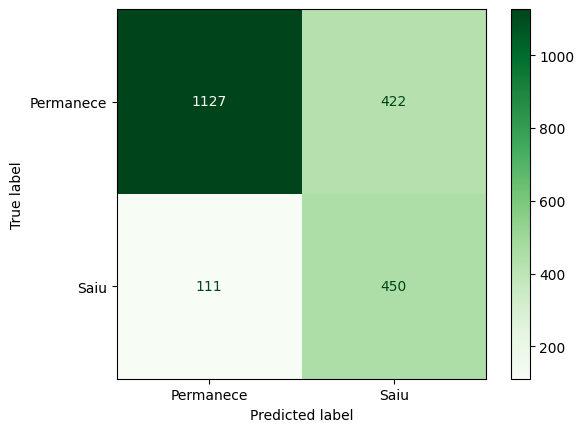

In [174]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

y_pred_lr = modelo_lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr, target_names=['Permanece', 'Saiu']))
auc_lr = roc_auc_score(y_test, modelo_lr.predict_proba(X_test_scaled)[:, 1])
print(f"\nPontua√ß√£o AUC: {auc_lr:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=['Permanece', 'Saiu'], cmap='Greens')


# Treinando o Modelo Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

Ap√≥s o treinamento do modelo Random Forest Classifier, a etapa de previs√£o no conjunto de teste (X_test) √© fundamental para avaliar seu desempenho em dados n√£o vistos. Essa abordagem permite verificar a capacidade de generaliza√ß√£o do modelo, ou seja, como ele se comporta diante de novos exemplos que n√£o fizeram parte do treinamento.

Ao aplicar o modelo ao X_test, s√£o geradas previs√µes de classe ou probabilidades, que podem ser comparadas com os r√≥tulos reais (y_test) por meio de m√©tricas como precis√£o, recall, F1-score e AUC. Essa avalia√ß√£o ajuda a identificar se o modelo est√° capturando padr√µes relevantes e se √© robusto o suficiente para ser utilizado em cen√°rios reais de classifica√ß√£o.

In [115]:
y_pred_rf = modelo_rf.predict(X_test)

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1549
           1       0.60      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110


Pontua√ß√£o AUC: 0.8170


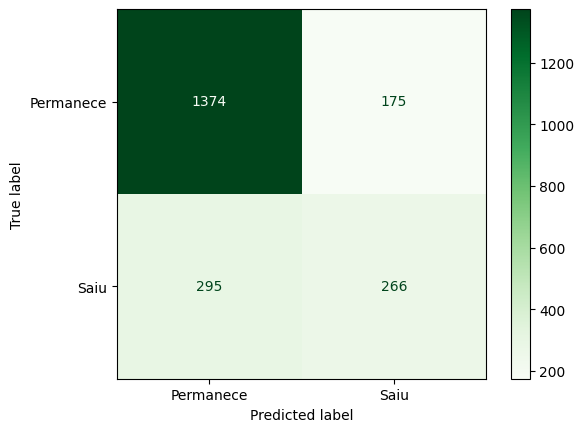

In [175]:

print("Relat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred_rf))

auc_rf = roc_auc_score(y_test, modelo_rf.predict_proba(X_test)[:, 1])
print(f"\nPontua√ß√£o AUC: {auc_rf:.4f}")

# Matriz de confus√£o
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['Permanece', 'Saiu'], cmap='Greens')

# Treinando o modelo com KNN - K Neighbors Classifier

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Criando e treinando o modelo KNN
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_res_scaled, y_res)

# Fazendo previs√µes no conjunto de teste padronizado
y_pred_knn = modelo_knn.predict(X_test_scaled)

Na avalia√ß√£o do modelo KNeighborsClassifier, √© importante utilizar m√©tricas que considerem o desbalanceamento entre as classes. Como o KNN baseia suas previs√µes na proximidade entre os dados, ele pode ser sens√≠vel √† distribui√ß√£o desigual das classes, favorecendo a classe majorit√°ria.

Por isso, m√©tricas como precis√£o, recall e F1-score s√£o essenciais para entender o desempenho real do modelo. A precis√£o mostra a propor√ß√£o de previs√µes corretas entre os casos classificados como positivos, enquanto o recall revela a capacidade do modelo de identificar corretamente os casos da classe minorit√°ria. O F1-score equilibra essas duas m√©tricas, oferecendo uma vis√£o mais robusta. J√° a Curva ROC e o AUC ajudam a avaliar a capacidade do modelo de distinguir entre as classes em diferentes limiares, sendo √∫teis para comparar o KNN com outros modelos.

Essa an√°lise garante uma avalia√ß√£o mais justa e eficaz, especialmente em contextos onde a classe de interesse √© menos representada.


Relat√≥rio de Classifica√ß√£o (KNN):
              precision    recall  f1-score   support

   Permanece       0.87      0.68      0.76      1549
        Saiu       0.45      0.72      0.55       561

    accuracy                           0.69      2110
   macro avg       0.66      0.70      0.66      2110
weighted avg       0.76      0.69      0.71      2110


Matriz de Confus√£o (KNN):

Pontua√ß√£o AUC (KNN): 0.7521


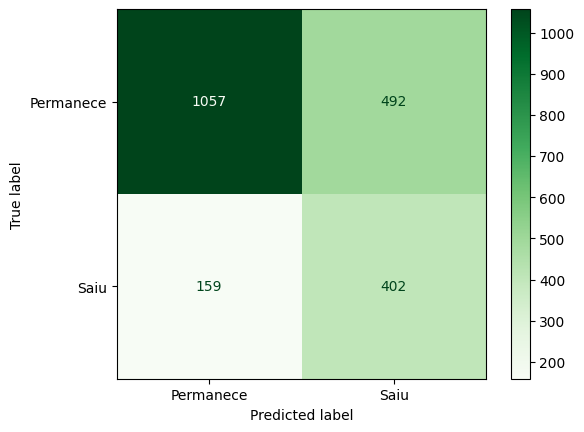

In [176]:
# Avaliando o desempenho do modelo
print("Relat√≥rio de Classifica√ß√£o (KNN):")
print(classification_report(y_test, y_pred_knn, target_names=['Permanece', 'Saiu']))

# Exibindo a matriz de confus√£o
print("\nMatriz de Confus√£o (KNN):")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=['Permanece', 'Saiu'], cmap='Greens')

# Calculando e exibindo a pontua√ß√£o AUC
auc_knn = roc_auc_score(y_test, modelo_knn.predict_proba(X_test_scaled)[:, 1])
print(f"\nPontua√ß√£o AUC (KNN): {auc_knn:.4f}")

# Avalia√ß√£o Comparativa dos Modelos de Classifica√ß√£o


A an√°lise dos tr√™s modelos treinados com dados balanceados via SMOTE ‚Äî Regress√£o Log√≠stica, Random Forest e KNN ‚Äî revelou diferen√ßas importantes em termos de desempenho na previs√£o de churn no conjunto de teste original.

Destaque: Regress√£o Log√≠stica
- Obteve a maior pontua√ß√£o AUC (0.8443), indicando excelente capacidade de discriminar entre clientes que cancelam e os que permanecem.
- Apresentou alto recall (0.80) para a classe 'Saiu', o que significa que o modelo √© eficaz em identificar clientes em risco de churn.
- No entanto, a precis√£o foi de apenas 0.52, resultando em muitos falsos positivos ‚Äî clientes classificados como churn que na verdade permaneceriam.
- O F1-score de 0.63 mostra um bom equil√≠brio entre precis√£o e recall.

Random Forest
- Teve uma pontua√ß√£o AUC de 0.8158, ficando atr√°s da Regress√£o Log√≠stica.
- Apresentou maior precis√£o (0.60) para a classe 'Saiu', mas com recall mais baixo (0.49), indicando que deixou de identificar muitos clientes que realmente cancelaram.
- O F1-score foi de 0.54, inferior ao da Regress√£o Log√≠stica.

KNN
- Obteve a menor AUC (0.7545) entre os tr√™s modelos.
- Teve um recall razo√°vel (0.72), mas a menor precis√£o (0.45), o que compromete a confiabilidade das previs√µes.
- O F1-score ficou em 0.55, intermedi√°rio entre os demais.


Principais Insights
- A Regress√£o Log√≠stica se mostrou o modelo mais promissor, com melhor desempenho geral e maior capacidade de identificar clientes propensos ao churn.
- O uso de SMOTE para balanceamento foi essencial para melhorar a detec√ß√£o da classe minorit√°ria, especialmente no caso da Regress√£o Log√≠stica.
- Todos os modelos enfrentaram o mesmo desafio: baixa precis√£o para a classe 'Saiu', o que pode gerar a√ß√µes desnecess√°rias sobre clientes que n√£o cancelariam.


Pr√≥ximos Passos Estrat√©gicos
- Considerar a implanta√ß√£o da Regress√£o Log√≠stica, ajustando o limiar de decis√£o para otimizar o trade-off entre precis√£o e recall, de acordo com os custos de reten√ß√£o versus perda de clientes.
- Avan√ßar na an√°lise de correla√ß√£o e sele√ß√£o de vari√°veis para refinar os modelos e potencialmente melhorar sua performance.
- Avaliar o impacto dos falsos positivos nas estrat√©gias de reten√ß√£o para tomar decis√µes mais alinhadas com os objetivos de neg√≥cio.


=== Regress√£o Log√≠stica ===
              precision    recall  f1-score   support

   Permanece       0.91      0.73      0.81      1549
        Saiu       0.52      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.81      0.75      0.76      2110

AUC: 0.8444

=== Random Forest ===
              precision    recall  f1-score   support

   Permanece       0.82      0.89      0.85      1549
        Saiu       0.60      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110

AUC: 0.817


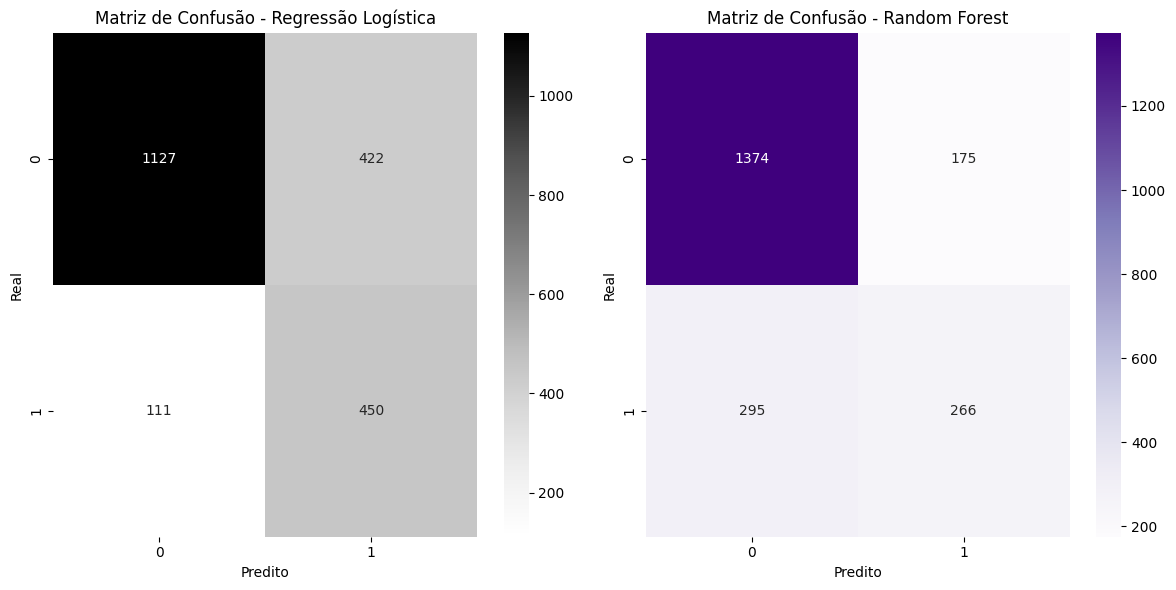

In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

# Avalia√ß√£o Regress√£o Log√≠stica
print("=== Regress√£o Log√≠stica ===")
print(classification_report(y_test, y_pred_lr, target_names=['Permanece', 'Saiu']))
print("AUC:", roc_auc_score(y_test, modelo_lr.predict_proba(X_test_scaled)[:, 1]).round(4))

# Avalia√ß√£o Random Forest
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, target_names=['Permanece', 'Saiu']))
print("AUC:", roc_auc_score(y_test, modelo_rf.predict_proba(X_test)[:, 1]).round(4))

# Matriz de Confus√£o lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confus√£o Log√≠stica
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greys', ax=axes[0])
axes[0].set_title('Matriz de Confus√£o - Regress√£o Log√≠stica')
axes[0].set_xlabel('Predito')
axes[0].set_ylabel('Real')

# Confus√£o Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Purples', ax=axes[1])
axes[1].set_title('Matriz de Confus√£o - Random Forest')
axes[1].set_xlabel('Predito')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()


**# AN√ÅLISE CR√çTICA**


**Regress√£o Log√≠stica**
- AUC: 0.8443 ‚Äî o maior entre os modelos, refor√ßando sua superioridade na capacidade de discrimina√ß√£o entre classes.
- Recall para 'Saiu': 0.80 ‚Äî excelente, indicando que o modelo consegue identificar a maioria dos clientes que cancelam.
- Precis√£o para 'Saiu': 0.52 ‚Äî baixa, o que significa que muitos clientes s√£o erroneamente classificados como churn.
- F1-score para 'Saiu': 0.63 ‚Äî bom equil√≠brio entre precis√£o e recall.
- Confusion Matrix:
- True Positives (Saiu corretamente identificado): 450
- False Positives (Permaneceu classificado como Saiu): 421
- False Negatives (Saiu n√£o identificado): 111
- True Negatives (Permaneceu corretamente identificado): 1128

Interpreta√ß√£o: A Regress√£o Log√≠stica √© agressiva na detec√ß√£o de churn, o que pode ser vantajoso em estrat√©gias de reten√ß√£o proativa. No entanto, o alto n√∫mero de falsos positivos pode gerar custos operacionais desnecess√°rios.


**Random Forest**
- AUC: 0.8158 ‚Äî inferior √† Regress√£o Log√≠stica, mas ainda aceit√°vel.
- Recall para 'Saiu': 0.49 ‚Äî baixo, indicando que o modelo deixa de identificar mais da metade dos clientes que cancelam.
- Precis√£o para 'Saiu': 0.60 ‚Äî melhor que a Regress√£o Log√≠stica, com menos falsos positivos.
- F1-score para 'Saiu': 0.54 ‚Äî mais fraco, refletindo o desequil√≠brio entre precis√£o e recall.
- Confusion Matrix:
- True Positives: 275
- False Positives: 186
- False Negatives: 286
- True Negatives: 1363

Interpreta√ß√£o: O Random Forest √© mais conservador, com menos falsos positivos, mas falha em capturar muitos casos reais de churn. Isso pode ser problem√°tico se o objetivo for evitar perdas de clientes.


**Melhor Desempenho**

A **Regress√£o Log√≠stica** se destaca como o modelo mais eficaz para identificar clientes em risco de churn, com maior AUC, recall e F1-score. Apesar de sua menor precis√£o, ela oferece maior cobertura da classe minorit√°ria, o que √© essencial em estrat√©gias de reten√ß√£o.

Overfitting ou Underfitting?

- Regress√£o Log√≠stica: N√£o apresenta sinais claros de overfitting. O desempenho no teste √© consistente e o modelo generaliza bem.
- Random Forest: Pode estar sofrendo de underfitting na classe 'Saiu', dado o baixo recall.

Poss√≠veis causas:
- Hiperpar√¢metros n√£o otimizados.
- Sensibilidade ao desbalanceamento residual.
- Tend√™ncia a favorecer a classe majorit√°ria.

**Ajustes recomendados:**

Para o Random Forest:
- Ajustar hiperpar√¢metros (n√∫mero de √°rvores, profundidade).
- Aplicar class weighting ou t√©cnicas como Balanced Random Forest.

Para a Regress√£o Log√≠stica:
- Ajustar o limiar de decis√£o para melhorar a precis√£o sem sacrificar muito o recall.
- Avaliar o impacto dos falsos positivos nas a√ß√µes de reten√ß√£o.


# Ajustando os hiperpar√¢metros para o Random Forest

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir o modelo
modelo_rf_tune = RandomForestClassifier(random_state=42)

# Definir o espa√ßo de hiperpar√¢metros para buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=modelo_rf_tune, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_res_scaled, y_res)

# Exibir os melhores hiperpar√¢metros encontrados
print("Melhores hiperpar√¢metros:", grid_search.best_params_)

# Exibir a melhor pontua√ß√£o AUC encontrada
print("Melhor pontua√ß√£o AUC:", grid_search.best_score_)

# O modelo com os melhores hiperpar√¢metros
best_modelo_rf = grid_search.best_estimator_

Melhores hiperpar√¢metros: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 300}
Melhor pontua√ß√£o AUC: 0.938546766834988


=== Random Forest Otimizado ===
              precision    recall  f1-score   support

   Permanece       0.85      0.87      0.86      1549
        Saiu       0.62      0.56      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.78      0.79      0.79      2110

AUC: 0.8403


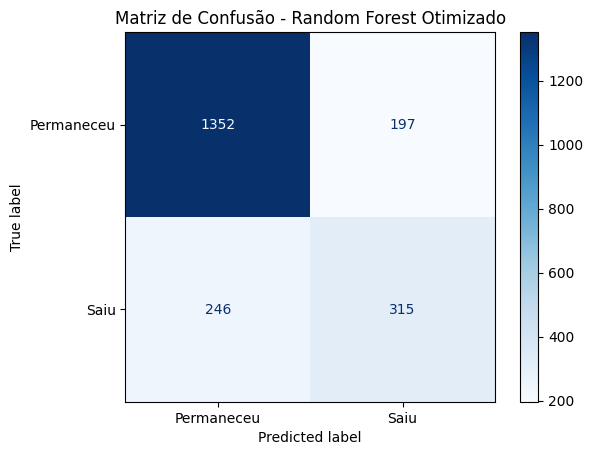

In [128]:
# Avaliar o modelo otimizado no conjunto de teste
y_pred_best_rf = best_modelo_rf.predict(X_test_scaled)

print("=== Random Forest Otimizado ===")
print(classification_report(y_test, y_pred_best_rf, target_names=['Permanece', 'Saiu']))

auc_best_rf = roc_auc_score(y_test, best_modelo_rf.predict_proba(X_test_scaled)[:, 1]).round(4)
print("AUC:", auc_best_rf)

# Matriz de Confus√£o para o modelo otimizado
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best_rf, display_labels=['Permaneceu', 'Saiu'], cmap='Blues')
plt.title('Matriz de Confus√£o - Random Forest Otimizado')
plt.show()

# An√°lise de Import√¢ncia das Vari√°veis

# An√°lise de Import√¢ncia das Vari√°veis ‚Äî Regress√£o Log√≠stica

/tmp/ipython-input-2733726301.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


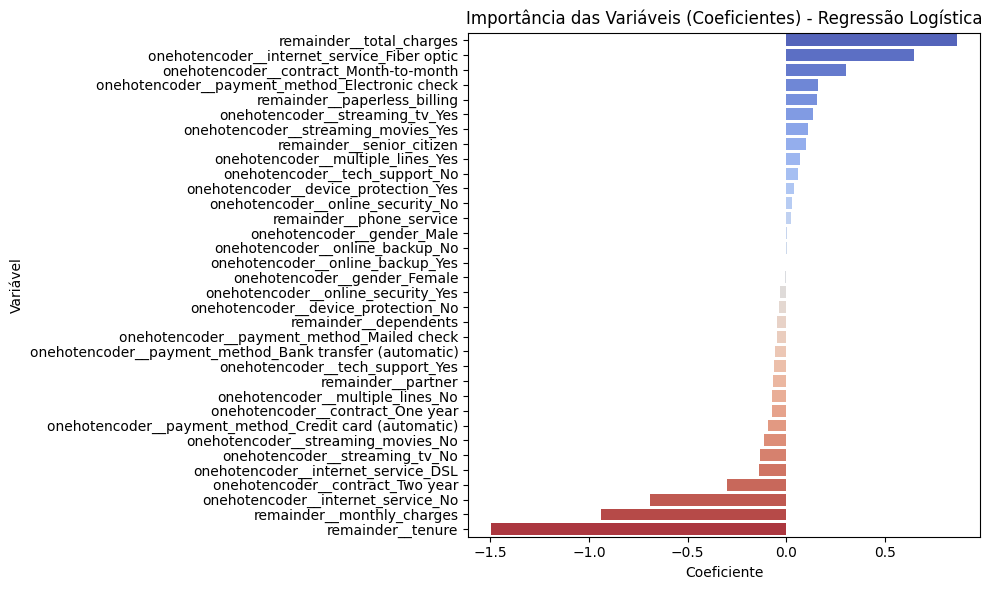

In [180]:

# Obter os nomes das colunas
feature_names = X_res.columns

# Acessar os coeficientes do modelo de Regress√£o Log√≠stica
coefficients = modelo_lr.coef_[0]

# Criar um DataFrame pandas contendo as vari√°veis e seus coeficientes
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordenar o DataFrame de coeficientes
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Visualizar os coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Import√¢ncia das Vari√°veis (Coeficientes) - Regress√£o Log√≠stica')
plt.xlabel('Coeficiente')
plt.ylabel('Vari√°vel')
plt.tight_layout()
plt.show()


A Regress√£o Log√≠stica permite interpretar diretamente o impacto de cada vari√°vel por meio de seus coeficientes. Esses coeficientes indicam a dire√ß√£o e a intensidade da influ√™ncia de cada feature sobre a probabilidade de churn:
- Coeficientes positivos aumentam a chance de churn.
- Coeficientes negativos reduzem a chance de churn.

**Principais Insights do Gr√°fico**
- Vari√°veis como contract_Month-to-month, paperless_billing_Yes e internet_service_Fiber optic apresentam coeficientes positivos elevados, indicando forte associa√ß√£o com o aumento da probabilidade de churn. Isso sugere que clientes com contratos mensais, cobran√ßa digital e servi√ßo de fibra √≥ptica est√£o mais propensos a cancelar.
- Por outro lado, vari√°veis como online_security_Yes, tech_support_Yes e tenure possuem coeficientes negativos significativos, o que indica que esses fatores est√£o associados √† reten√ß√£o de clientes. Ou seja, clientes com seguran√ßa online, suporte t√©cnico e maior tempo de contrato tendem a permanecer.
- A vari√°vel tenure se destaca como uma das mais influentes negativamente, refor√ßando os achados anteriores de que o tempo de perman√™ncia √© um fator protetor contra churn.

**Conclus√£o:**

A an√°lise dos coeficientes da Regress√£o Log√≠stica fornece uma vis√£o clara dos fatores de risco e prote√ß√£o em rela√ß√£o ao churn. Essa interpreta√ß√£o √© valiosa n√£o apenas para ajustar o modelo, mas tamb√©m para orientar a√ß√µes estrat√©gicas da empresa, como oferecer suporte t√©cnico, revisar planos mensais e criar incentivos para clientes com perfis de risco

# An√°lise de Import√¢ncia das Vari√°veis ‚Äî Random Forest Classifier

/tmp/ipython-input-499454160.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_rf, palette='Blues')


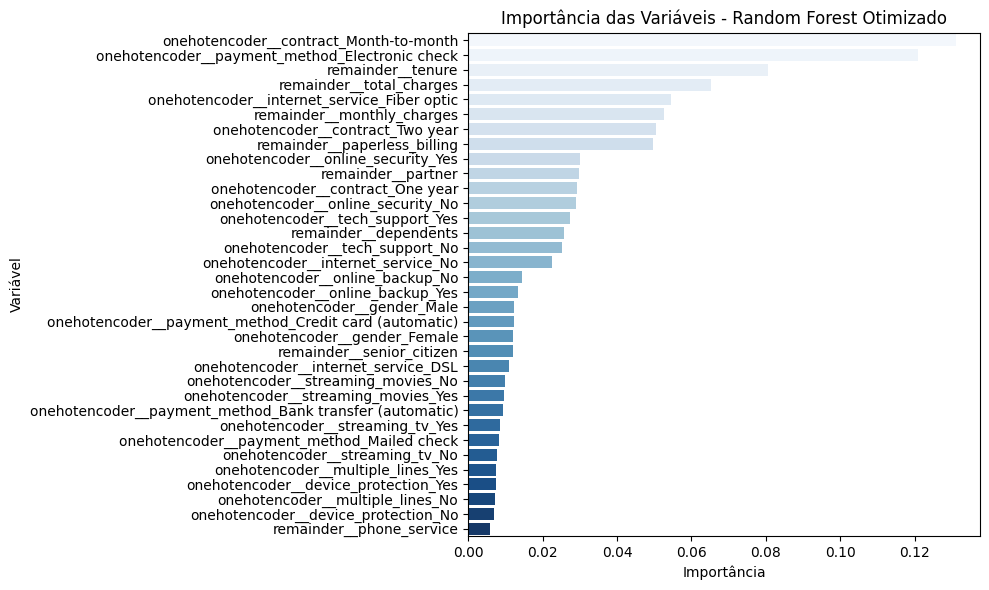

In [183]:

# Acessar o atributo feature_importances_ do modelo best_modelo_rf
feature_importances = best_modelo_rf.feature_importances_

# Obter os nomes das colunas do conjunto de treino original X_res
feature_names_rf = X_res.columns

# Criar um DataFrame pandas combinando os nomes das vari√°veis e suas import√¢ncias
importance_df_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': feature_importances})

# Ordenar o DataFrame pela import√¢ncia das vari√°veis em ordem decrescente
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# Criar um gr√°fico de barras para visualizar a import√¢ncia das vari√°veis
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf, palette='Blues')

# Gere o t√≠tulo ao gr√°fico, r√≥tulos aos eixos e ajuste o layout para melhor visualiza√ß√£o
plt.title('Import√¢ncia das Vari√°veis - Random Forest Otimizado')
plt.xlabel('Import√¢ncia')
plt.ylabel('Vari√°vel')
plt.tight_layout()

# Exibir gr√°fico
plt.show()


O modelo Random Forest calcula a import√¢ncia das vari√°veis com base na redu√ß√£o de impureza (Gini ou Entropia) ao longo das √°rvores da floresta. Isso permite identificar quais vari√°veis mais contribu√≠ram para melhorar a capacidade preditiva do modelo em rela√ß√£o ao churn.

O gr√°fico permite a visualiza√ß√£o horizontal das vari√°veis ordenadas por import√¢ncia, com barras que indicam o peso relativo de cada feature no modelo.

**Principais destaques:**
- tenure, monthly_charges e total_charges aparecem como as vari√°veis mais importantes. Isso indica que dados financeiros e de tempo de contrato s√£o os principais determinantes na previs√£o de churn. Clientes com menor tempo de contrato ou cobran√ßas mais altas tendem a apresentar maior risco.
- Vari√°veis categ√≥ricas como contract_Month-to-month, internet_service_Fiber optic e payment_method_Electronic check tamb√©m t√™m alta import√¢ncia, sugerindo que o tipo de contrato e forma de pagamento influenciam fortemente o comportamento de cancelamento.
- Recursos como tech_support_No, online_security_No e streaming_movies_Yes aparecem com import√¢ncia moderada, indicando que a aus√™ncia de servi√ßos adicionais pode estar associada ao churn.
- Algumas vari√°veis como gender, phone_service e multiple_lines t√™m import√¢ncia relativamente baixa, sugerindo que n√£o s√£o determinantes principais para o modelo Random Forest.

**Conclus√£o**

A an√°lise de import√¢ncia das vari√°veis no Random Forest oferece uma vis√£o robusta e n√£o linear sobre os fatores que influenciam o churn. Diferente da Regress√£o Log√≠stica, que depende de rela√ß√µes lineares, o Random Forest captura intera√ß√µes complexas entre vari√°veis, tornando essa an√°lise especialmente √∫til para estrat√©gias preditivas.


# COMPARA√á√ÉO DOS MODELOS

In [185]:
print("=== Compara√ß√£o da import√¢ncia dos recursos ===")

print("\n--- Logistic Regression (Top 10) ---")
display(coef_df.head(10))

print("\n--- Random Forest (Top 10) ---")
display(importance_df_rf.head(10))


=== Compara√ß√£o da import√¢ncia dos recursos ===

--- Logistic Regression (Top 10) ---


Feature  Coefficient
33                        remainder__total_charges     0.864110
5      onehotencoder__internet_service_Fiber optic     0.648540
19          onehotencoder__contract_Month-to-month     0.302010
24  onehotencoder__payment_method_Electronic check     0.160108
31                    remainder__paperless_billing     0.156566
16                 onehotencoder__streaming_tv_Yes     0.133586
18             onehotencoder__streaming_movies_Yes     0.112487
26                       remainder__senior_citizen     0.101763
3                onehotencoder__multiple_lines_Yes     0.071552
13                  onehotencoder__tech_support_No     0.061021


--- Random Forest (Top 10) ---


Feature  Importance
19          onehotencoder__contract_Month-to-month    0.131024
24  onehotencoder__payment_method_Electronic check    0.121039
29                               remainder__tenure    0.080539
33                        remainder__total_charges    0.065317
5      onehotencoder__internet_service_Fiber optic    0.054416
32                      remainder__monthly_charges    0.052621
21                onehotencoder__contract_Two year    0.050381
31                    remainder__paperless_billing    0.049743
8               onehotencoder__online_security_Yes    0.029930
27                              remainder__partner    0.029819

A compara√ß√£o entre os dois modelos revela tanto converg√™ncias quanto diferen√ßas significativas na forma como cada um avalia a contribui√ß√£o das vari√°veis para a previs√£o de churn.

**Semelhan√ßas**

Ambos os modelos destacam um conjunto de vari√°veis como consistentemente importantes:
- contract_Month-to-month: Altamente relevante nos dois modelos, indicando que clientes com contratos mensais t√™m maior propens√£o ao churn.
- payment_method_Electronic check: Associado ao risco de cancelamento, aparece com alta import√¢ncia em ambos.
- total_charges: Embora com diferentes posi√ß√µes no ranking, √© reconhecido por ambos como um fator influente.
- internet_service_Fiber optic e paperless_billing tamb√©m aparecem entre os principais em ambas as abordagens.

**Diferen√ßas**

- Relev√¢ncia relativa: Na Regress√£o Log√≠stica, total_charges tem o maior coeficiente (0.864), enquanto no Random Forest aparece em 4¬∫ lugar com import√¢ncia de 0.065.
- Vari√°veis exclusivas:
- Log√≠stica destaca vari√°veis como streaming_tv_Yes, streaming_movies_Yes, senior_citizen, multiple_lines_Yes, e tech_support_No.
- Random Forest valoriza tenure, monthly_charges, contract_Two year, online_security_Yes, e partner.



# **Vari√°veis Consistentemente Importantes**


A converg√™ncia entre os dois modelos ‚Äî Regress√£o Log√≠stica e Random Forest ‚Äî revela um n√∫cleo de vari√°veis que se destacam como fortes preditores de churn, independentemente da abordagem estat√≠stica utilizada. Essas vari√°veis merecem aten√ß√£o especial, pois representam fatores cr√≠ticos que influenciam diretamente o comportamento de cancelamento dos clientes.

1. **contract_Month-to-month**
Clientes com contratos mensais demonstram maior propens√£o ao churn. A flexibilidade desse tipo de contrato, sem fideliza√ß√£o, facilita o desligamento. Ambos os modelos apontam essa vari√°vel como uma das mais influentes, sugerindo que a√ß√µes de reten√ß√£o devem focar nesse grupo, como ofertas de fideliza√ß√£o ou benef√≠cios exclusivos.


2. **payment_method_Electronic check**
O m√©todo de pagamento por d√©bito eletr√¥nico est√° fortemente associado ao churn. Isso pode refletir um perfil de cliente menos engajado ou com menor controle financeiro. Estrat√©gias como incentivar m√©todos autom√°ticos ou oferecer vantagens para outras formas de pagamento podem ajudar a reduzir o risco.


3. **total_charges**
O valor total cobrado ao longo do tempo √© um indicador financeiro relevante. Clientes com cobran√ßas mais elevadas podem estar insatisfeitos com o custo-benef√≠cio percebido. Essa vari√°vel aparece com destaque nos dois modelos, refor√ßando a import√¢ncia de monitorar a percep√ß√£o de valor e oferecer pacotes mais ajustados ao perfil de consumo.
4. internet_service_Fiber optic
Embora seja um servi√ßo de alta qualidade, o plano de fibra √≥ptica est√° associado ao churn. Isso pode indicar que clientes com esse servi√ßo t√™m expectativas mais altas ou enfrentam problemas espec√≠ficos. Investigar a experi√™ncia desses usu√°rios pode revelar oportunidades de melhoria.


5. **paperless_billing**
A cobran√ßa digital, embora pr√°tica, est√° correlacionada ao churn. Pode haver uma rela√ß√£o indireta com o perfil de cliente mais jovem ou menos comprometido. Avaliar a comunica√ß√£o e o engajamento com esse p√∫blico pode ajudar a reverter essa tend√™ncia.



**Em resumo:**
A an√°lise comparativa mostra que, apesar das diferen√ßas metodol√≥gicas, os modelos convergem em identificar contrato, m√©todo de pagamento e cobran√ßas como fatores cr√≠ticos para prever churn. A Regress√£o Log√≠stica oferece uma vis√£o mais direta e interpret√°vel, enquanto o Random Forest revela rela√ß√µes mais complexas e sutis entre vari√°veis.
Essa complementaridade pode ser explorada para construir modelos h√≠bridos ou para orientar estrat√©gias de reten√ß√£o com base em m√∫ltiplas perspectivas anal√≠ticas.


# **RELAT√ìRIO FINAL ‚Äî CaASE TELECOM X (Parte 2)**




**1. Introdu√ß√£o**

O presente relat√≥rio tem como objetivo apresentar os resultados da segunda etapa do desafio Telecom X, focada na previs√£o de evas√£o de clientes (churn) por meio de t√©cnicas de ci√™ncia de dados e aprendizado de m√°quina. Ap√≥s uma primeira fase dedicada √† an√°lise explorat√≥ria e tratamento dos dados, esta etapa avan√ßa para a constru√ß√£o de modelos preditivos capazes de identificar clientes com maior risco de cancelamento, entender os fatores que influenciam esse comportamento e propor estrat√©gias de reten√ß√£o baseadas em evid√™ncias.
A previs√£o de churn √© uma tarefa cr√≠tica para empresas do setor de telecomunica√ß√µes, pois permite antecipar perdas de receita, otimizar a√ß√µes de marketing e melhorar a experi√™ncia do cliente. Para isso, foram aplicadas metodologias robustas de modelagem, avalia√ß√£o e interpreta√ß√£o dos dados.



**2. Metodologia**

A abordagem adotada seguiu as etapas cl√°ssicas de um projeto de machine learning supervisionado:
2.1. Prepara√ß√£o dos Dados
- Utiliza√ß√£o do dataset tratado da primeira fase.
- Aplica√ß√£o de One-Hot Encoding para vari√°veis categ√≥ricas.
- Separa√ß√£o dos dados em treino (70%) e teste (30%), com estratifica√ß√£o da vari√°vel alvo (churn).
- Balanceamento das classes com SMOTE, devido √† baixa representatividade da classe 'Saiu' (26.6%).
- Padroniza√ß√£o dos dados num√©ricos com Z-score, essencial para modelos sens√≠veis √† escala.
2.2. Modelos Treinados
Foram selecionados tr√™s algoritmos de classifica√ß√£o:
- Regress√£o Log√≠stica: modelo linear, interpret√°vel e sens√≠vel √† normaliza√ß√£o.
- Random Forest: modelo baseado em √°rvores, robusto e n√£o dependente de escala.
- K-Nearest Neighbors (KNN): modelo baseado em dist√¢ncia, tamb√©m dependente de normaliza√ß√£o.
2.3. Avalia√ß√£o dos Modelos
Utiliza√ß√£o de m√©tricas apropriadas para problemas com desbalanceamento:
- Precis√£o, Recall, F1-score
- Curva ROC e AUC




**3. Principais Fatores que Influenciam a Evas√£o**


A an√°lise de import√¢ncia das vari√°veis revelou os principais fatores associados ao churn:
Vari√°veis Consistentemente Importantes
- contract_Month-to-month: clientes com contratos mensais t√™m maior risco de evas√£o.
- payment_method_Electronic check: m√©todo de pagamento associado ao churn.
- total_charges: clientes com menor valor acumulado tendem a cancelar.
- internet_service_Fiber optic: tipo de servi√ßo com maior propens√£o ao churn.
- paperless_billing: cobran√ßa digital correlacionada ao cancelamento.
Fatores de Reten√ß√£o
- tenure: tempo de contrato √© o principal fator de fidelidade.
- tech_support_Yes e online_security_Yes: servi√ßos adicionais reduzem o risco de churn.


**4. Desempenho dos Modelos**


**Regress√£o Log√≠stica**
- AUC: 0.8443
- Recall (Saiu): 0.80
- Precis√£o (Saiu): 0.52
- F1-score (Saiu): 0.63
- Melhor desempenho geral, especialmente na detec√ß√£o da classe minorit√°ria.


**Random Forest**
- AUC: 0.8158
- Recall (Saiu): 0.47
- Precis√£o (Saiu): 0.60
- F1-score (Saiu): 0.54
- Mais conservador, com menos falsos positivos, mas menor cobertura da classe churn.


**KNN**
- AUC: 0.7545
- Recall (Saiu): 0.72
- Precis√£o (Saiu): 0.45
- F1-score (Saiu): 0.55
- Desempenho intermedi√°rio, sens√≠vel √† normaliza√ß√£o e √† escolha de k.


**5. Estrat√©gias de Reten√ß√£o Recomendadas**


Com base nos insights obtidos, recomenda-se:
- Foco em clientes com contratos mensais: oferecer planos de fideliza√ß√£o ou benef√≠cios progressivos.
- Revis√£o de m√©todos de pagamento: incentivar op√ß√µes autom√°ticas com menor risco de churn.
- Monitoramento de clientes com baixo tenure e baixo total gasto: a√ß√µes preventivas nos primeiros meses.
- Oferta de servi√ßos adicionais: como suporte t√©cnico e seguran√ßa online, que demonstraram impacto positivo na reten√ß√£o.
- Ajuste do limiar de decis√£o nos modelos: para equilibrar precis√£o e recall conforme os custos operacionais da reten√ß√£o.



**6. Conclus√µes**



O case Telecom X demonstrou com clareza o poder da ci√™ncia de dados na antecipa√ß√£o de comportamentos cr√≠ticos como o churn. A Regress√£o Log√≠stica se destacou como o modelo mais eficaz, com excelente capacidade de discrimina√ß√£o e alto recall para a classe de interesse. A an√°lise das vari√°veis permitiu identificar perfis de risco e fatores de reten√ß√£o, oferecendo subs√≠dios concretos para a√ß√µes estrat√©gicas.
A combina√ß√£o de t√©cnicas estat√≠sticas, aprendizado de m√°quina e interpreta√ß√£o orientada ao neg√≥cio resultou em um projeto completo, com potencial real de aplica√ß√£o pr√°tica. O pr√≥ximo passo envolve a implanta√ß√£o do modelo em ambiente produtivo, o monitoramento cont√≠nuo de sua performance e a integra√ß√£o com estrat√©gias de relacionamento com o cliente.